<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

## PCA

,Eigenvalue,PCA
0,5.219011,PCA1
1,3.235273,PCA2
2,2.443738,PCA3
3,1.790786,PCA4
4,1.385636,PCA5
5,1.091869,PCA6
6,0.985803,PCA7
7,0.813795,PCA8
8,0.626491,PCA9
9,0.577521,PCA10


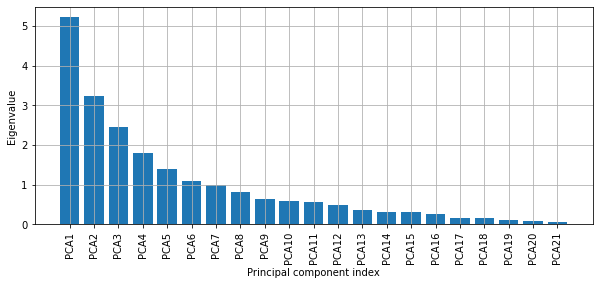

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import geopandas as gpd

# Load dataset
indata = "/home/compass/CPB_vector.shp"
outpath = '/home/compass/out'

# Read data to GeoDataFrame
df = gpd.read_file(indata)

# Define and select features
col_selec = ['kNDVI',
             'Tmax', 'Tmin', 'Prcp',
             'Forest', 'Shrub', 'Crop', 'Wetland',
             'Shannon',
             'Elevation', 'Aspect', 'Slope', 'TWI',
             'Clay_mean', 'Sand_mean', 'BD_mean', 'PH_mean', 'SOC_mean', 'TN_mean',
             'Inundation',
             'Distance'
            ]

df = df[col_selec]

# Normalization
sc = StandardScaler()
df_scaled = sc.fit_transform(df)

# Convert array to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=col_selec)

# PCA
pca = PCA(n_components=df_scaled.shape[1])

# Perform PCA and transform the data
df_pca = pca.fit_transform(df_scaled)

# Eigenvalue
eigenvalue_df = pd.DataFrame(pca.explained_variance_, columns=['Eigenvalue'])
eigenvalue_df["PCA"] = [f'PCA{i}' for i in np.arange(1, len(eigenvalue_df) + 1)]
display(eigenvalue_df)

# Plot the Eigenvalues
fig = plt.figure(figsize=(10, 4))
plt.bar(x=eigenvalue_df["PCA"],
        height=eigenvalue_df['Eigenvalue'],
        align='center'
        )
plt.xlabel('Principal component index')
plt.xticks(rotation=90)
plt.ylabel('Eigenvalue')

# Add grid
plt.grid()

# Save the plot
plt.savefig('/home/compass/out/Eigenvalue.png',
            format='png', dpi=100, bbox_inches='tight', pad_inches=1)
plt.show()


array([0.24851153, 0.40256418, 0.51892666, 0.6041978 , 0.67017707,
       0.72216815, 0.76910872, 0.80785888, 0.83769022, 0.86518982,
       0.89219618, 0.91502635, 0.93229404, 0.94670638, 0.96089369,
       0.97300111, 0.98045885, 0.98758148, 0.99242744, 0.99669879,
       1.        ])

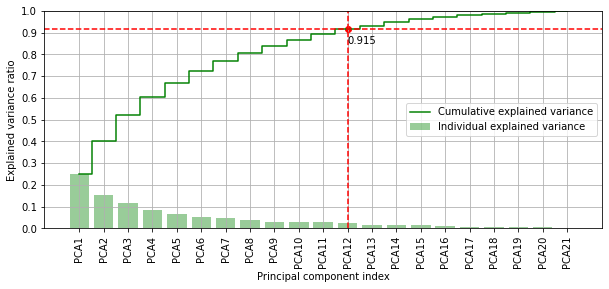

In [5]:
# Determine explained variance using explained_variance_ratio_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Calculate cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
display(cum_sum_eigenvalues)

# Create the visualization plot
fig = plt.figure(figsize=(10, 4))

# Plot individual explained variance
plt.bar([f'PCA{i}' for i in np.arange(1, len(eigenvalue_df) + 1)],
        exp_var_pca,
        align='center',
        color='green',
        alpha=0.4,
        label='Individual explained variance'
        )

# Plot cumulative explained variance as a step plot
plt.step(range(0, len(cum_sum_eigenvalues)),
         cum_sum_eigenvalues,
         where='mid',
         color='green',
         alpha=0.99,
         label='Cumulative explained variance'
         )

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')

# Set x-axis labels
plt.xticks([f'PCA{i}' for i in np.arange(1, len(eigenvalue_df) + 1)], rotation=90)

# Set y-axis limits and tick positions
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.ylim([0, 1])

# Add gridlines
plt.grid()

# Add lines for PCA12 and 0.915
plt.axvline(x='PCA12', color='r', linestyle='--')  # Vertical line
plt.axhline(y=0.915, color='r', linestyle='--')  # Horizontal line

# Add legend
plt.legend(loc='center right')

# Add a label to the plot
plt.text('PCA12', 0.85, "0.915")
plt.scatter('PCA12', 0.915, color='#ff0000', zorder=1)

# Save the plot (optional, commented out)
plt.savefig('/home/compass/out/Explained_variance.png',
            format='png', dpi=100, bbox_inches='tight', pad_inches=1)
# display
plt.show()
